### Set-Up
Set up Colab to read the data from your course Google Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
import os
os.chdir("/content/drive/My Drive/AIMOOC")
!ls

Modules  Staff


## Multiple Linear Regression

y = a*$x_1$ + b*$x_2$ + c*$x_3$ + d

The dependent variable:
* y = salary (in thousands of dollars)

These are the independent variables:
* $x_1$ = years of education (4 = high school education, 8 = college education, 8+ = graduate studies)
* $x_2$ = net worth (in thousands of dollars)
* $x_3$ = work experience (in years)
* $x_4$ = cost of their home (in thousands of dollars)
* $x_5$ = height (inches)





In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/AIMOOC/Modules/Module2/Data/salary.csv")
df

,salary,years_education,net_worth,work_experience,home_cost,height
0,284,14,354,8,295,50
1,256,12,552,2,442,59
2,270,7,634,8,490,65
3,246,4,704,7,531,64
4,170,8,244,4,156,66
...,...,...,...,...,...,...
195,145,6,296,2,206,61
196,286,11,550,7,405,68
197,237,7,308,12,262,68
198,193,11,165,5,106,65


## Individual R^2 values for x1, x2, x3, x4, x5


 years_education
Coefficients: [8.85569883]
Intercept: 172.57991476341385
R2 0.4358962785523256


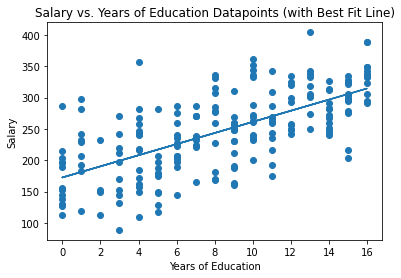


 net_worth
Coefficients: [0.17685801]
Intercept: 157.62908770867602
R2 0.3248678319670427


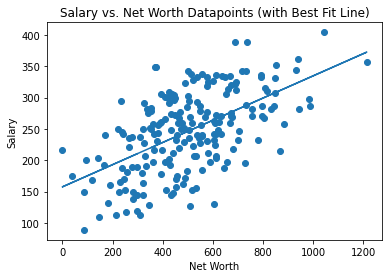


 work_experience
Coefficients: [8.27331882]
Intercept: 191.7969960311442
R2 0.1452912942888469


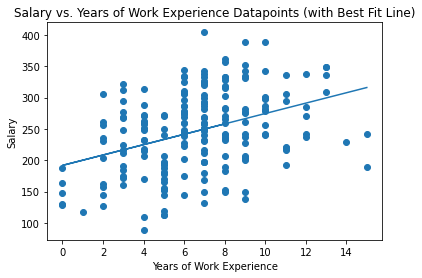


 home_cost
Coefficients: [0.23360405]
Intercept: 158.43291094822854
R2 0.3206909919880526


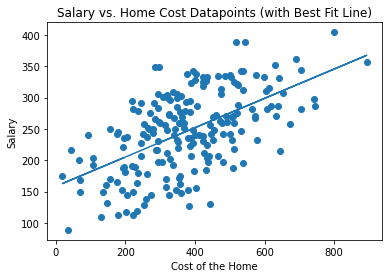


 height
Coefficients: [0.59458819]
Intercept: 210.9924098167732
R2 0.002102025785963857


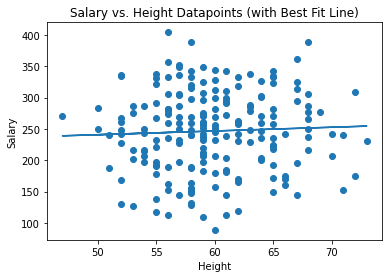

In [8]:
import sklearn.linear_model as lm 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

y = df["salary"]
x1 = df[["years_education"]]
x2 = df[["net_worth"]]
x3 = df[["work_experience"]]
x4 = df[["home_cost"]]
x5 = df[["height"]]

def do_fit(x, y):
  # do linear regression and print the slope and y-intercept
  lin_reg = lm.LinearRegression()
  lin_reg.fit(x, y) 
  print('Coefficients:', lin_reg.coef_)
  print('Intercept:', lin_reg.intercept_)

  # create a new figure, plot all the data points and the best fit line
  plt.figure()
  plt.scatter(x, y)
  ypred = lin_reg.predict(x)
  plt.plot(x, ypred)

  # calculate and print mean squared error and R2
  print("R2", lin_reg.score(x, y))

print('\n', "years_education")
do_fit(x1, y)
plt.xlabel("Years of Education")
plt.ylabel("Salary")
plt.title("Salary vs. Years of Education Datapoints (with Best Fit Line)")
plt.show()

print('\n', "net_worth")
do_fit(x2, y)
plt.xlabel("Net Worth")
plt.ylabel("Salary")
plt.title("Salary vs. Net Worth Datapoints (with Best Fit Line)")
plt.show()

print('\n', "work_experience")
do_fit(x3, y)
plt.xlabel("Years of Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs. Years of Work Experience Datapoints (with Best Fit Line)")
plt.show()

print('\n', "home_cost")
do_fit(x4, y)
plt.xlabel("Cost of the Home")
plt.ylabel("Salary")
plt.title("Salary vs. Home Cost Datapoints (with Best Fit Line)")
plt.show()

print('\n', "height")
do_fit(x5, y)
plt.xlabel("Height")
plt.ylabel("Salary")
plt.title("Salary vs. Height Datapoints (with Best Fit Line)")
plt.show()


In [9]:
import sklearn.linear_model as lm 

def do_multiple_fit(x, y):
  # do linear regression and print the slope, y-intercept and R^2
  lin_reg = lm.LinearRegression()
  lin_reg.fit(x, y) 
  print('Coefficients:', lin_reg.coef_)
  print('Intercept:', lin_reg.intercept_)
  print("R2", lin_reg.score(x, y))


## R^2 values for a model with multiple variables

### Use x1 and x2

In [10]:
xlist = df[["years_education","net_worth"]]
lin_reg = do_multiple_fit(xlist, y)


Coefficients: [9.92781604 0.20468636]
Intercept: 60.74418514608064
R2 0.8646534602033209


### Use x1, x2, and x4

In [11]:
xlist = df[["years_education","net_worth","home_cost"]]
lin_reg = do_multiple_fit(xlist, y)

Coefficients: [9.92801315 0.19547109 0.01233195]
Intercept: 60.72412350260535
R2 0.8646650402419698


Note that R^2 didn't change after adding x4.

### Use x1, x2, and x5

In [12]:
xlist = df[["years_education","net_worth","height"]]
lin_reg = do_multiple_fit(xlist, y)

Coefficients: [9.91257638 0.20485801 0.17261068]
Intercept: 50.46994282038244
R2 0.8648288608400438


Note that R^2 didn't change here either. 

### Use x1, x2, and x3

In [13]:
xlist = df[["years_education","net_worth","work_experience"]]
lin_reg = do_multiple_fit(xlist, y)

Coefficients: [9.99954947 0.20002234 7.99261051]
Intercept: 9.618414418822226
R2 0.9999787228305245


We get an R^2 of almost 1. This tells us that we found all the relevant independent variables. We can now specify a relationship between salary and these 3 independent variables.

salary$ =~ 10*$years_education$ + 0.2*$net_worth$ + 8*$work_experience$ + 10$

## Re-examine adding x5: why did this not increase R^2 substantially?

Adding x5 did not increase R^2 because its individual R^2 is very small. So x5 is just noise.

## Re-examine adding x4: why did this not increase R^2 substantially?

### Use x1, x4, and x3

In [14]:
xlist = df[["years_education","home_cost","work_experience"]]
lin_reg = do_multiple_fit(xlist, y)

Coefficients: [9.9898977  0.26415113 7.9847661 ]
Intercept: 10.67873683973653
R2 0.9945737746942843


R^2 is as high with this combination as it was with x1, x2, and x3. This coupled with the original individual R^2 values for x2 and x4 means that x2 and x4 depend on each other. 

### Use x1, x2, x3, x4, and x5

In [15]:
xlist = df[["years_education","net_worth","work_experience", "home_cost", "height"]]
lin_reg = do_multiple_fit(xlist, y)

Coefficients: [ 9.99954250e+00  2.00414720e-01  7.99264164e+00 -5.25128063e-04
 -1.28898488e-05]
Intercept: 9.619836769200731
R2 0.9999787437997415


Adding all variables results in a slightly higher R^2 value than just using three variables. But note that the magnitude of the x4 and x5 coefficients is very small. This suggests that they should not be included in the model. Also recall that: 

* x5 is noise because its individual R^2 is very small so it should not be included.
* x4 and x2 are dependent on each other, so only one should be included. 

The correct model for y only involves: 

* x1, x2, and x3 
* or x1, x4, and x3